# Rhys

In [1]:

import pandas as pd
import numpy as np

# Import the data file
df = pd.read_csv("../data/raw/US_Gun_Violence_Data.csv")

# Methods for using our dates to filter into months and years
def clean_month(row):
    
    months = ['January','February','March','April','May','June','July','August','September','October','November','December']
    month = [m for m in months if(m in row.incident_date)]
    return month[0]
    
def clean_year(row):
    
    years = ['2014','2015','2016','2017','2018','2019','2020','2021','2022'] 
    year = [y for y in years if(y in row.incident_date)]
    return int(year[0])

# Filter out the uneeded columns
df_cleaned = df.copy().drop(['incident_id','address'], axis=1)
df_cleaned = df_cleaned.dropna(axis=0)

# Filters our day into seperate months and years
# Must run below methods first
df_cleaned['month'] = df_cleaned.apply(lambda row: clean_month(row), axis=1)
df_cleaned['year'] = df_cleaned.apply(lambda row: clean_year(row), axis=1)

# Renames our columns to look more freindly and useable
df_cleaned = df_cleaned.rename(columns={"city_or_county":"City/County","state":"State","killed":"Killed","injured":"Injured", "year":"Year","month":"Month"})

# Filters out what is not a full year and deaths more than 15 and injured more than 20
df_cleaned = df_cleaned[df_cleaned['Killed'] < 15]
df_cleaned = df_cleaned[df_cleaned['Injured'] < 20]
df_cleaned = df_cleaned[df_cleaned['Year'] < 2021]

# Creates a total row, combining killed and injured 
df_cleaned['Total'] = df_cleaned['Killed'] + df_cleaned['Injured']

# Lastly sets our columns to the useful information we will be using
df_cleaned = df_cleaned[['Year','Month','State','City/County','Killed','Injured','Total']]


print(df_cleaned)
    



      Year     Month          State   City/County  Killed  Injured  Total
232   2020  December        Indiana  Indianapolis       1        3      4
233   2020  December         Oregon  Happy Valley       0        4      4
234   2020  December       Illinois      Rockford       3        3      6
235   2020  December        Florida         Tampa       2        2      4
236   2020  December  Massachusetts          Lynn       1        5      6
...    ...       ...            ...           ...     ...      ...    ...
2925  2014   January        Alabama    Huntsville       0        5      5
2926  2014   January    Mississippi       Jackson       0        4      4
2927  2014   January   Pennsylvania          Erie       1        3      4
2928  2014   January       New York        Queens       1        3      4
2929  2014   January       Virginia       Norfolk       2        2      4

[2689 rows x 7 columns]


<AxesSubplot:title={'center':'Number of Incidents per Year'}, xlabel='Year'>

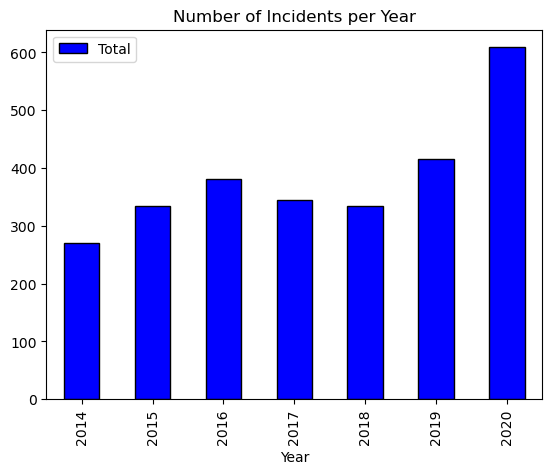

In [21]:
df_year = df_cleaned.groupby('Year').count()
df_year = df_year.drop('Month', axis=1)
df_year = df_year.drop('State', axis=1)
df_year = df_year.drop('City/County', axis=1)
df_year = df_year.drop('Killed', axis=1)
df_year = df_year.drop('Injured', axis=1)

df_year.plot(kind = 'bar', title = 'Number of Incidents per Year', facecolor = 'blue', edgecolor = 'black')

<AxesSubplot:title={'center':'Number of Incidents per Month'}, xlabel='Month'>

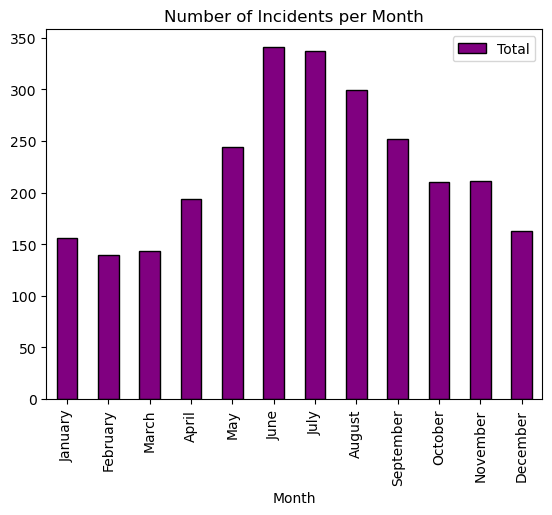

In [29]:
df_month = df_cleaned.groupby('Month').count()
df_month = df_month.drop('Year', axis=1)
df_month = df_month.drop('State', axis=1)
df_month = df_month.drop('City/County', axis=1)
df_month = df_month.drop('Killed', axis=1)
df_month = df_month.drop('Injured', axis=1)
df_month = df_month.reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])
df_month.plot(kind = 'bar', title = 'Number of Incidents per Month', facecolor = 'purple', edgecolor = 'black')

In [14]:
a = len(df_cleaned)
b = 365*7
# Size of our data, or number of columns
# Divided by the number days from the start to the end of our data
print("Average number of shootings per day:",round(a/b,2))

Average number of shootings per day: 1.05


In [15]:
df_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Year,Killed,Injured,Total
count,2689.000000,2689.000000,2689.000000,2689.000000
mean,2017.421346,0.995165,3.976199,4.971365
std,2.036279,1.429251,1.958315,1.872697
min,2014.000000,0.000000,0.000000,4.000000
25%,2016.000000,0.000000,3.000000,4.000000
50%,2018.000000,1.000000,4.000000,4.000000
75%,2019.000000,1.000000,5.000000,5.000000
max,2020.000000,13.000000,19.000000,27.000000


#### Above is a standard, mean, max and min of our dataset after it was filtered to remove injured and killed outliers. As you can see on average 1 person was killed and 4 were injured per incident.

In [16]:

df_total = df_cleaned.copy()
df_total = df_total.drop('Year',axis = 1)
df_total = df_total.drop('Killed', axis = 1)
df_total = df_total.drop('Injured', axis = 1)
df_total.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Total
count,2689.000000
mean,4.971365
std,1.872697
min,4.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,27.000000


In [17]:
df_cleaned.nunique(axis=0)

Year             7
Month           12
State           48
City/County    809
Killed          13
Injured         20
Total           20
dtype: int64

#### Below is a scatter plot of how many were per incident each state

<AxesSubplot:title={'center':'Number killed in each State'}, xlabel='State', ylabel='Killed'>

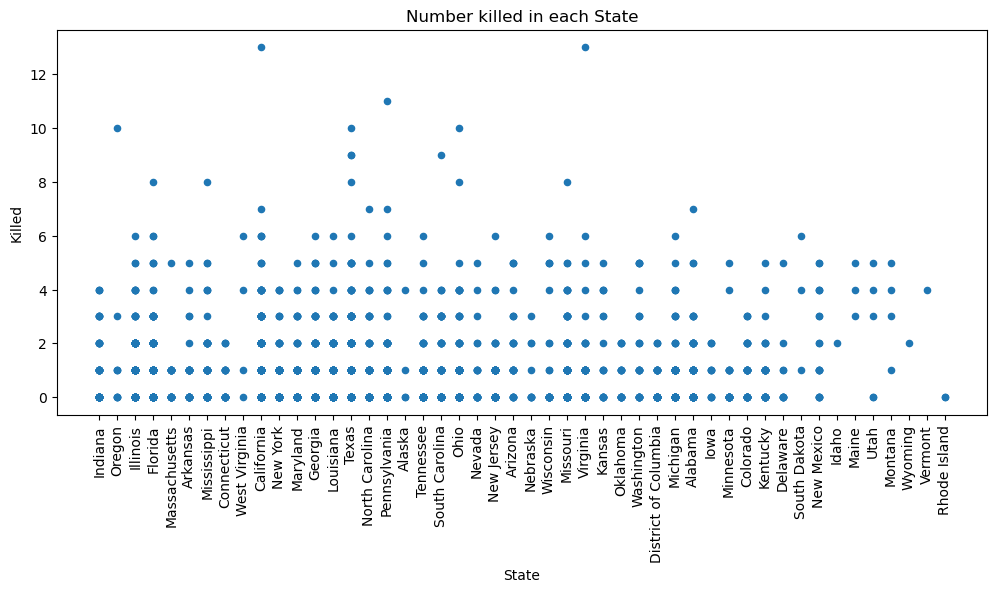

In [ ]:
df_cleaned.plot(kind = 'scatter',figsize=(12,5), x = 'State', y = 'Killed', rot = 90, title = "Number killed in each State")

### Below is a scatter plot of the number of people injured per incident seperated by state.

<AxesSubplot:title={'center':'Number injured in each state'}, xlabel='State', ylabel='Injured'>

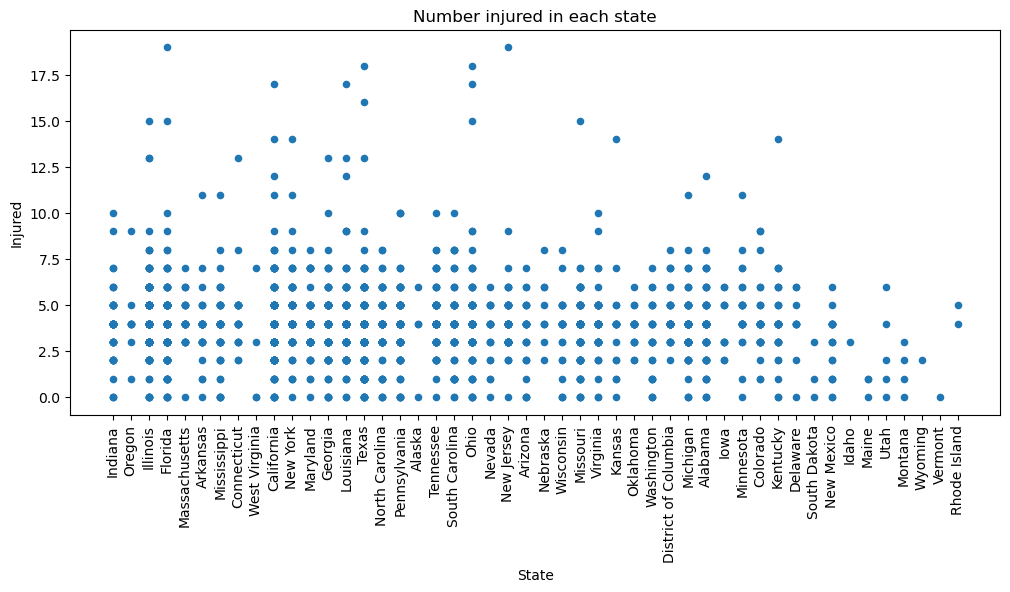

In [5]:
df_cleaned.plot(kind = 'scatter',figsize=(12,5), x = 'State', y = 'Injured', rot = 90, title = 'Number injured in each state')

#### The graph below shows the frequency of about how many people were killed per incident analzyed.

<AxesSubplot:title={'center':'Frequency of killed per incident'}, ylabel='Frequency'>

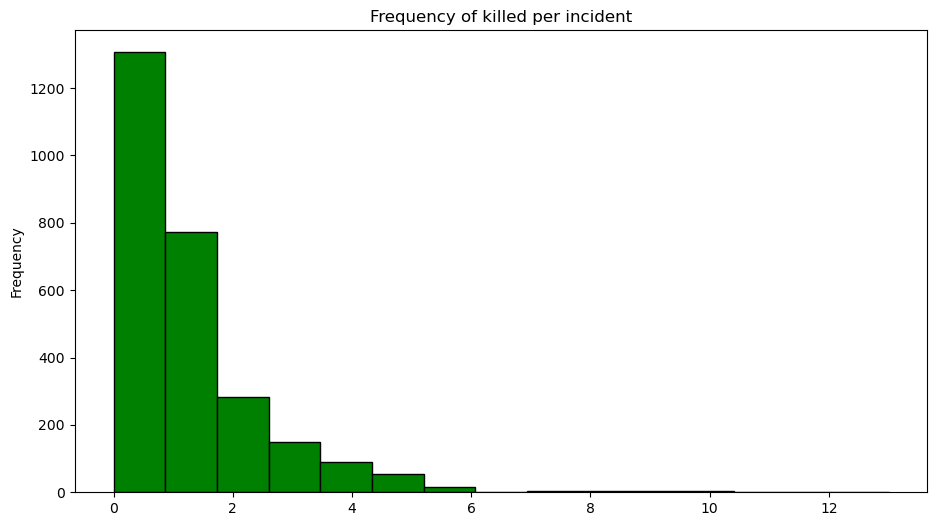

In [ ]:
df_cleaned['Killed'].plot(kind='hist', bins=15, figsize=(11,6), facecolor='green',edgecolor='black',title = "Frequency of killed per incident")

#### Below is a graph showing the frequecy of people injured per incident.

<AxesSubplot:title={'center':'Frequency of injured per incident'}, ylabel='Frequency'>

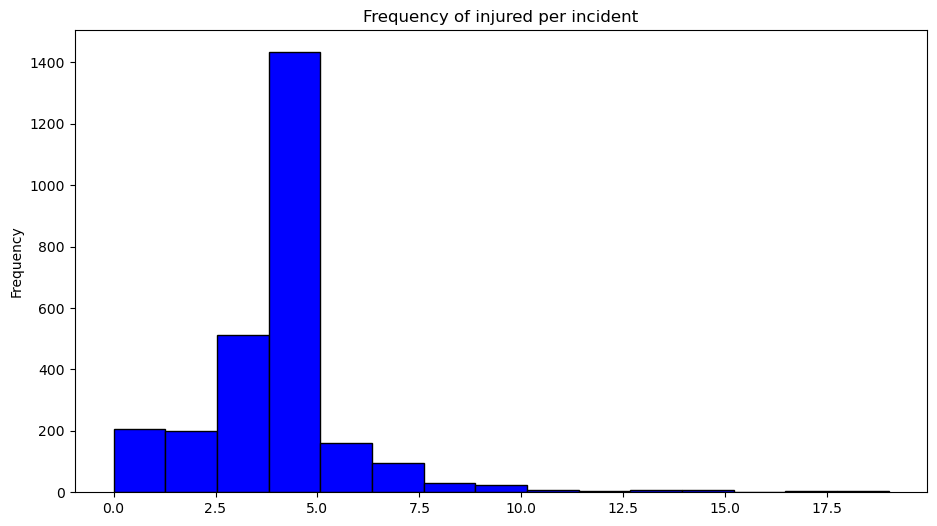

In [ ]:
df_cleaned['Injured'].plot(kind='hist', bins=15, figsize=(11,6), facecolor='blue',edgecolor='black',title = "Frequency of injured per incident")

#### Above is a graph showing the frequency of the people injured per incident.

#### Below is a relative import of my project_functions1.py file where we used method chaining to clean and anaylze our data.

In [ ]:
from project_functions1 import load_and_process
df = load_and_process("../data/raw/US_Gun_Violence_Data.csv")
df




,Year,Month,State,City/County,Killed,Injured,Total
232,2020,December,Indiana,Indianapolis,1,3,4
233,2020,December,Oregon,Happy Valley,0,4,4
234,2020,December,Illinois,Rockford,3,3,6
235,2020,December,Florida,Tampa,2,2,4
236,2020,December,Massachusetts,Lynn,1,5,6
...,...,...,...,...,...,...,...
2925,2014,January,Alabama,Huntsville,0,5,5
2926,2014,January,Mississippi,Jackson,0,4,4
2927,2014,January,Pennsylvania,Erie,1,3,4
2928,2014,January,New York,Queens,1,3,4


## Research question/interests

I wonder what is required for it to be considered a mass shooting? Most of the shootings we hear about through the media or the news generally have multiple casualties as well as many injured and are usually classified as mass shootings but currently there is not a set definition.
I find it quite interesting how often shootings occur in the US. 
With what feels like on average one occuring each day from when our data began. Which in my opinion is far too often than it should be for preventable incidents. 
 #####
I wonder why nothing is being done about gun violence desipte it increasing in recent years?
I also find it quite interesting that the frequency of shootings has also gone up since 2014. This is quite concerning as an increase in shootings leads to more death and injuries across the US.
 #####
Since we started this project, I have also been wondering that as shootings have been increasing over the recent years, which months of the year are the mostl deadly or the most shootings occur. 